Dataset loaded successfully.

--- Dataset Overview ---
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Dataset Shape: (506, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    50

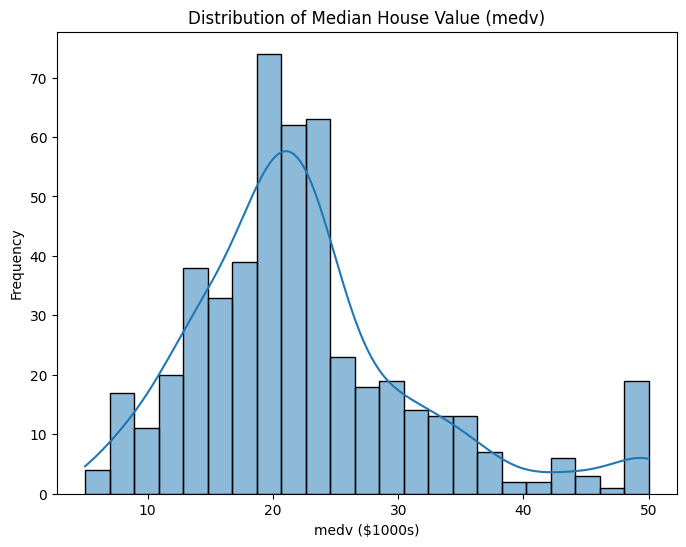

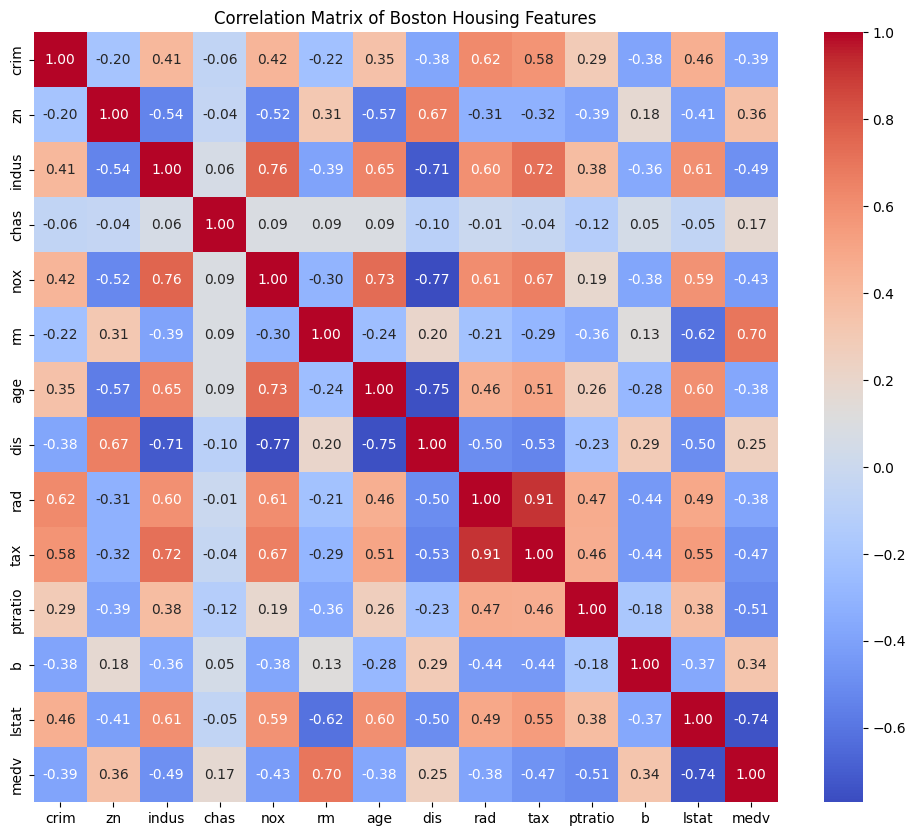


--- Debugging fit() issue ---
Shape of X_train_scaled: (400, 13)
Shape of y_train: (400,)
Type of X_train_scaled: <class 'numpy.ndarray'>
Type of y_train: <class 'pandas.core.series.Series'>
NaNs in X_train_scaled: 0
Infs in X_train_scaled: 0
NaNs in y_train: 0
Infs in y_train: 0
--- End debugging lines ---

--- Cross-Validation Results (Negative MSE) ---
Linear Regression CV MSE: 25.86 +/- 7.41
Random Forest Regressor CV MSE: 12.40 +/- 2.62

--- Test Set Performance ---
Linear Regression - MSE: 20.69, R2: 0.72
Random Forest Regressor - MSE: 8.98, R2: 0.88

🏆 Best performing model: Random Forest Regressor

--- Saving Model Artifacts ---
Model saved successfully to ../model.pkl
Scaler saved successfully to ../scaler.pkl
Features list saved successfully to ../features.pkl

Notebook execution complete. Please verify the generated .pkl files in your root directory.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Load the dataset
# IMPORTANT: Ensure your CSV file is named 'BostonHousing.csv' with a capital 'B'
# If your CSV is named 'boston_housing.csv' (lowercase 'b'), change the line below accordingly.
# The path '../data/BostonHousing.csv' assumes you run the notebook from the 'notebooks' folder
# and your CSV is in a 'data' folder one level up.
try:
    df = pd.read_csv('../data/BostonHousing.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'BostonHousing.csv' not found. Please ensure it's in the 'data' folder.")
    raise SystemExit("Dataset not found. Exiting notebook execution.")

# --- Step 2: Data Analysis and Preprocessing ---
print("\n--- Dataset Overview ---")
print(df.head())
print("\nDataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nDescriptive Statistics:")
print(df.describe())

# IMPORTANT: Verify the actual column names in your CSV.
actual_columns = df.columns.tolist()
print("\nColumns in the loaded DataFrame:", actual_columns)

target_column_name = 'medv' # Set your expected target column name here
if target_column_name not in actual_columns:
    print(f"Error: Target column '{target_column_name}' not found in dataset. Found columns: {actual_columns}")
    print("Please update 'target_column_name' variable in this script to match your CSV.")
    raise SystemExit(f"Target column '{target_column_name}' missing. Exiting notebook execution.")

print(f"\nMissing Values Before Handling (for all columns):")
print(df.isnull().sum())

# --- FIX: Handle missing values explicitly ---
# Option 1: Drop rows with any missing values (common for this dataset if few NaNs)
df.dropna(inplace=True)
print("\nMissing Values After Handling (dropna):")
print(df.isnull().sum())
print(f"New Dataset Shape after dropping NaNs: {df.shape}")

# Option 2: Fill missing numerical values with the mean (uncomment if you prefer this)
# for col in df.columns:
#     if df[col].dtype in ['int64', 'float64'] and df[col].isnull().any():
#         df[col].fillna(df[col].mean(), inplace=True)
# print("\nMissing Values After Handling (fillna with mean):")
# print(df.isnull().sum())
# print(f"New Dataset Shape after filling NaNs: {df.shape}")
# -----------------------------------------------

# Visualizations
plt.figure(figsize=(8, 6))
sns.histplot(df[target_column_name], kde=True)
plt.title(f'Distribution of Median House Value ({target_column_name})')
plt.xlabel(f'{target_column_name} ($1000s)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Boston Housing Features')
plt.show()

# Define features (X) and target (y)
X = df.drop(target_column_name, axis=1) # Features
y = df[target_column_name]              # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 3: Model Training ---

# --- Debugging lines (crucial for "fit()" errors) ---
# These should now show 0 NaNs and Infs
print("\n--- Debugging fit() issue ---")
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Type of X_train_scaled: {type(X_train_scaled)}")
print(f"Type of y_train: {type(y_train)}")
print(f"NaNs in X_train_scaled: {np.isnan(X_train_scaled).sum()}")
print(f"Infs in X_train_scaled: {np.isinf(X_train_scaled).sum()}")
print(f"NaNs in y_train: {np.isnan(y_train).sum()}")
print(f"Infs in y_train: {np.isinf(y_train).sum()}")
print("--- End debugging lines ---")
# --- EXPECT ALL NaNs/Infs TO BE 0 AND SHAPES TO BE CONSISTENT ---

# Model 1: Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train) # This should now work!

# Model 2: Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# Cross-validation for model evaluation
print("\n--- Cross-Validation Results (Negative MSE) ---")
lin_reg_cv_scores = -cross_val_score(lin_reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Linear Regression CV MSE: {lin_reg_cv_scores.mean():.2f} +/- {lin_reg_cv_scores.std():.2f}")

rf_reg_cv_scores = -cross_val_score(rf_reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest Regressor CV MSE: {rf_reg_cv_scores.mean():.2f} +/- {rf_reg_cv_scores.std():.2f}")

# Compare model performance on the test set
y_pred_lin_reg = lin_reg.predict(X_test_scaled)
y_pred_rf_reg = rf_reg.predict(X_test_scaled)

mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)

print("\n--- Test Set Performance ---")
print(f"Linear Regression - MSE: {mse_lin_reg:.2f}, R2: {r2_lin_reg:.2f}")
print(f"Random Forest Regressor - MSE: {mse_rf_reg:.2f}, R2: {r2_rf_reg:.2f}")

# Select the best-performing model
if r2_rf_reg > r2_lin_reg:
    best_model = rf_reg
    model_name = "Random Forest Regressor"
else:
    best_model = lin_reg
    model_name = "Linear Regression"

print(f"\n🏆 Best performing model: {model_name}")

# Save the trained model, scaler, and feature names
# These files should be saved to the project root directory, hence '../'
pickle_model_path = '../model.pkl'
pickle_scaler_path = '../scaler.pkl'
pickle_features_path = '../features.pkl' # This will save the exact feature names (e.g., 'CRIM', 'ZN', etc.)

print("\n--- Saving Model Artifacts ---")
try:
    with open(pickle_model_path, 'wb') as file:
        pickle.dump(best_model, file)
    print(f"Model saved successfully to {pickle_model_path}")

    with open(pickle_scaler_path, 'wb') as file:
        pickle.dump(scaler, file)
    print(f"Scaler saved successfully to {pickle_scaler_path}")

    with open(pickle_features_path, 'wb') as file:
        pickle.dump(X.columns.tolist(), file) # Save the list of feature names used for training
    print(f"Features list saved successfully to {pickle_features_path}")

except Exception as e:
    print(f"ERROR during saving files: {e}")
    print("Please check file permissions, disk space, or if the objects (best_model, scaler, X.columns.tolist()) are valid and not None.")

print("\nNotebook execution complete. Please verify the generated .pkl files in your root directory.")